<h3>
Khai báo các thư viện cần thiết
</h3>

In [217]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from private_module import visualize_orbit

Đọc dữ liệu từ file "measData.csv"

In [218]:
df = pd.read_csv("data/measData.csv")
df_ground_truth = pd.read_csv('data/groundtruthData.csv') # Lấy dữ liệu trong thực tế để đối chiếu

print("Các trường thuộc tính của dữ liệu measData:")
print(df.columns)

print()
print("Các trường thuộc tính của dữ liệu groundtruthData:")
print(df_ground_truth.columns)

print()
print("Năm dòng đầu tiên của bộ dữ liệu measData:")
print(df.head())

print()
print("Năm dòng đầu tiên của bộ dữ liệu groundtruthData:")
print(df_ground_truth.head())

Các trường thuộc tính của dữ liệu measData:
Index(['timeSeries', 'Azimuth (rad)', 'Range (m)'], dtype='object')

Các trường thuộc tính của dữ liệu groundtruthData:
Index(['timeSeries', 'Azimuth (rad)', 'Range (m)', 'Speed (m/s)',
       'Heading (rad)'],
      dtype='object')

Năm dòng đầu tiên của bộ dữ liệu measData:
   timeSeries  Azimuth (rad)    Range (m)
0           0      -2.619192  200076.6746
1          10      -2.622475  198853.7752
2          20      -2.622916  197974.2480
3          30      -2.633978  196907.8388
4          40      -2.622791  195972.3070

Năm dòng đầu tiên của bộ dữ liệu groundtruthData:
   timeSeries  Azimuth (rad)    Range (m)  Speed (m/s)  Heading (rad)
0           0      -2.619852  200000.0000          120       1.049056
1          10      -2.622887  198963.9228          120       1.049056
2          20      -2.625954  197929.6974          120       1.049056
3          30      -2.629053  196897.3532          120       1.049056
4          40      -2.6321

<h4>
    Nội dung của bộ dữ liệu: 
</h4>

Bộ dữ liệu “measData.csv” chứa thông tin quỹ đạo của một mục tiêu phát hiện bởi Radar với các giá trị trong các thuộc tính có ý nghĩa như sau:
+ Cột "Time Series": Cho biết thời điểm của mục tiêu tại vị trí đấy (giây - gốc thời gian là 0s), cột dữ liệu này đơn điệu tăng, tỉ lệ thuận gấp 10 với chỉ số của từng hàng dữ liệu
+ Cột “Azimuth”: giá trị phương vị (góc hình học, gốc tại 3h, tăng ngược chiều kim đồng hồ). Đơn vị: radian
+ Cột “Range”: giá trị cự ly (khoảng cách đến tâm đài Radar). Đơn vị: mét

Nội dung của 3 cột thuộc tính được minh hoạ trong ảnh dưới đây: 
    
<center>
      <img src="./img_for_notebook/polar_coordinate.jpg" alt="Ảnh minh hoạ 3 thuộc tính">
</center>

<h3>
    Thực hiện thống kê mô tả để hiểu hai bộ dữ liệu
</h3>

Kiểm tra sự tồn tại của giá trị null trong bộ dữ liệu

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timeSeries     500 non-null    int64  
 1   Azimuth (rad)  500 non-null    float64
 2   Range (m)      500 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


--> Không có sự tồn tại giá trị null trong các cột dữ liệu

Trước tiên, ta sẽ cùng thử xem qua các tham số đặc trưng, và các biểu đồ hộp của thuộc tính

In [220]:
print("Các tham số thống kê mô tả bộ dữ liệu từ Radar:")
df.describe()

Các tham số thống kê mô tả bộ dữ liệu từ Radar:


,timeSeries,Azimuth (rad),Range (m)
count,500.000000,500.000000,500.000000
mean,2495.000000,0.338989,130133.787614
std,1444.818328,1.966283,49302.402205
min,0.000000,-3.135104,53291.338400
25%,1247.500000,-2.633359,93822.983782
50%,2495.000000,1.190902,127094.953800
75%,3742.500000,1.387258,159423.774875
max,4990.000000,3.146498,252131.570500


In [221]:
print("Các tham số thống kê mô tả bộ dữ liệu thực (ground_truth):")
df_ground_truth.describe()

Các tham số thống kê mô tả bộ dữ liệu thực (ground_truth):


,timeSeries,Azimuth (rad),Range (m),Speed (m/s),Heading (rad)
count,500.000000,500.000000,500.000000,500.0,500.000000
mean,2495.000000,0.339928,130143.015414,120.0,0.827312
std,1444.818328,1.966400,49306.534278,0.0,0.948417
min,0.000000,-3.132285,53350.504760,120.0,-3.122281
25%,1247.500000,-2.632975,93779.647502,120.0,0.398921
50%,2495.000000,1.196307,127151.719000,120.0,0.918156
75%,3742.500000,1.392863,159456.377300,120.0,1.049056
max,4990.000000,3.139154,252156.450700,120.0,3.073638


Từ bộ dữ liệu thực cho thấy đây là một thực thể chuyển động đều

Trên thực tế, trạng thái của mục tiêu được biết thông qua dữ liệu từ Radar, nên việc thực hiện thống kê sẽ tập trung vào bộ dữ liệu này

<h4>
    Khảo sát bộ dữ liệu từ radar (measData)
</h4>

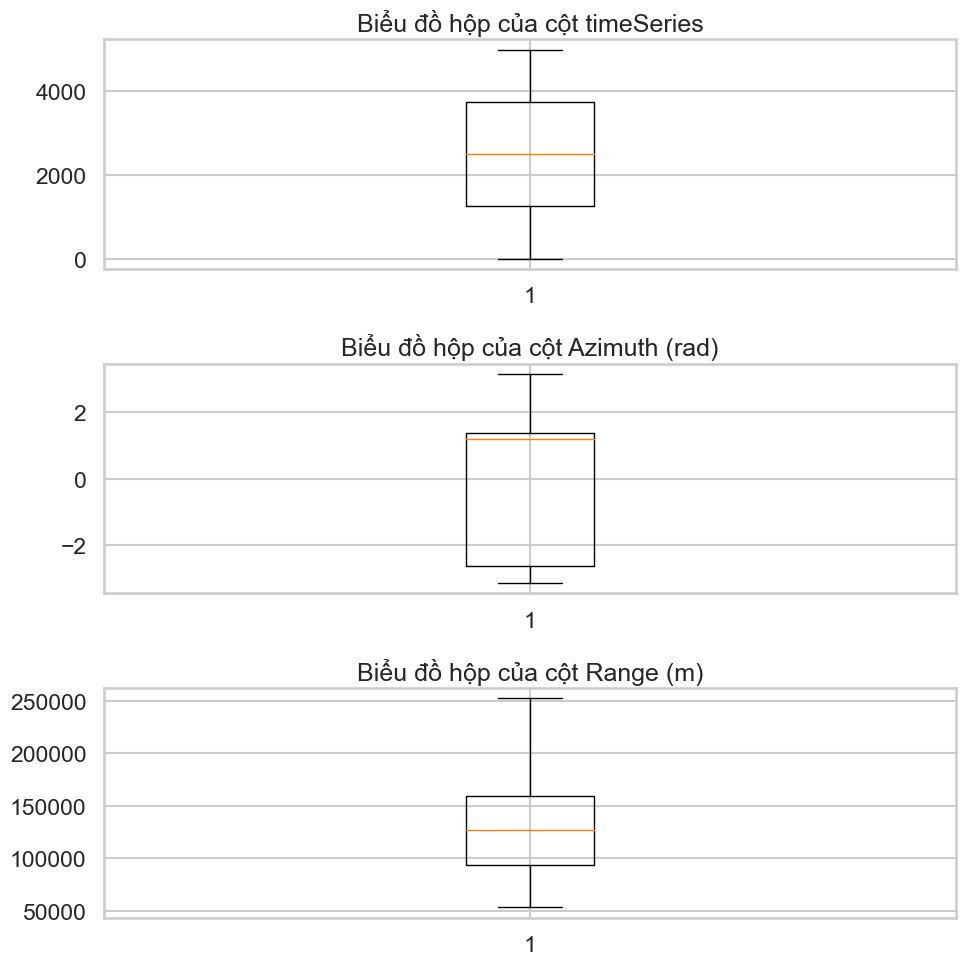

In [222]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))


# Iterate through the subplots and plot some data
for i, ax in enumerate(axes.flat):
    ax.boxplot(df[df.columns[i]])
    ax.set_title(f"Biểu đồ hộp của cột {df.columns[i]}")


plt.tight_layout()  # Làm cho các chữ không bị dính vào nhau
plt.show()

Tiếp theo, ta sẽ thể hiện tần suất đồ của các giá trị trong các cột thuộc tính kết hợp với biểu đồ đường (Do các cột thuộc tính có giá trị theo chuỗi thời gian nên trục hoành có thể xem là sự biểu hiện của thuộc tính thời gian)

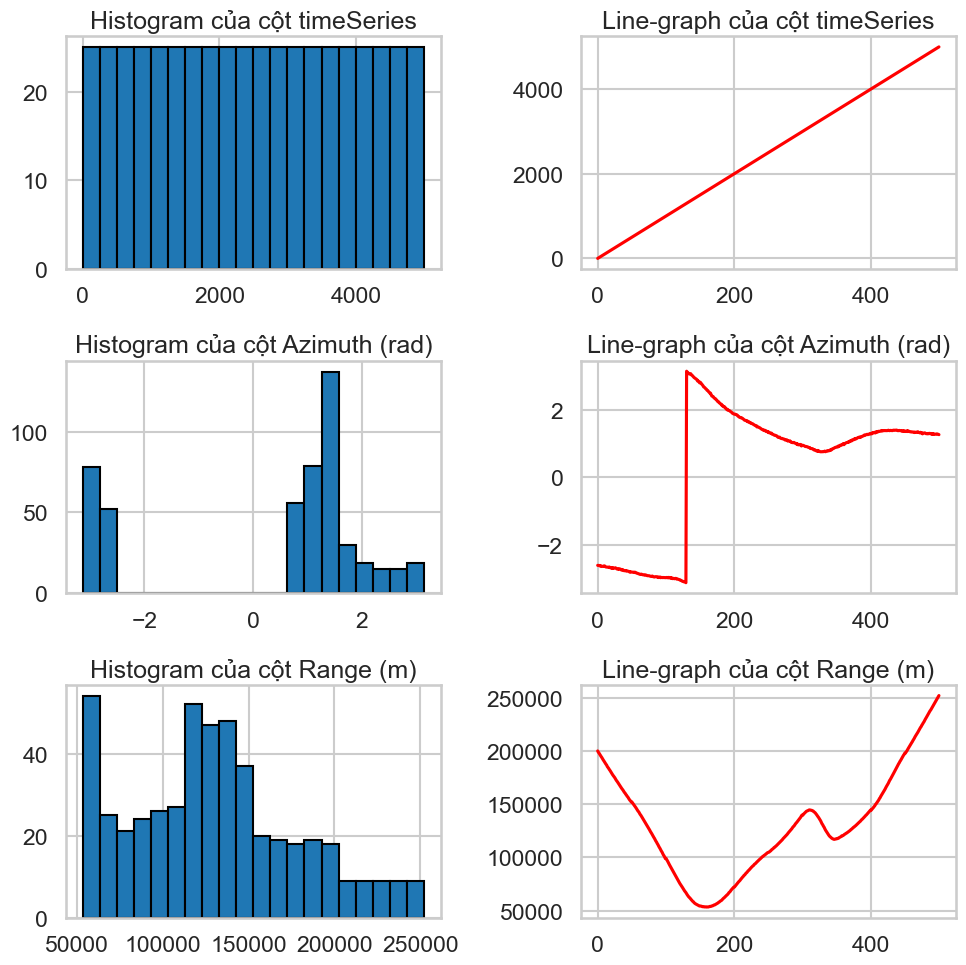

In [223]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))


# Iterate through the subplots and plot some data
for i in range(3):
    for j in range(2):
        if j % 2 == 0:
            ax[i][j].hist(df[df.columns[i]], bins=20, edgecolor = "black")
            ax[i][j].set_title(f"Histogram của cột {df.columns[i]}")
        else:
            ax[i][j].plot(df[df.columns[i]], color = "r")
            ax[i][j].set_title(f"Line-graph của cột {df.columns[i]}")

    
plt.tight_layout()  # Làm cho các chữ không bị dính vào nhau

plt.show()


**Nhận xét:**
+ Dữ liệu timeSerie tỉ lệ tuyến tính với chỉ số của hàng khi quan sát trên đồ thị (với tỷ lệ cụ thể là 10).
    <br>
+ Trong biểu đồ đường của cột dữ liệu Azimuth (Góc phương vị), có sự gián đoạn dữ liệu tại một điểm có giá trị trên trục hoành vào khoảng (1200s, 1400s). Điều này có thể giải thích là do trong khoảng thời gian đấy, mục tiêu đang di chuyển từ góc phần tư thứ III sang đến góc phần tư thứ II (trên trục toạ độ Descartes, với gốc toạ độ là vị trí Radar), để thể hiện sự liên tục, ta có thể thay đổi các giá trị góc phương vị âm sang các giá trị dương tương ứng.
    <br>
+ Cùng với đó, ở biểu đồ đường của cột Azimuth và cột Range không có tính tuần hoàn, đặc biệt cột Range có xu hướng nghịch biến ở thời điểm đầu, sau đó đồng biến ở thời gian ước tính (1400s - 1600s), sau đó có sự nghịch biến nhẹ trước khi tiếp tục đồng biến, nên có thể nhận định rằng: Mục tiêu không di chuyển quanh Radar mà đang di chuyển từ xa lại gần và tiếp tục di chuyển ra xa.

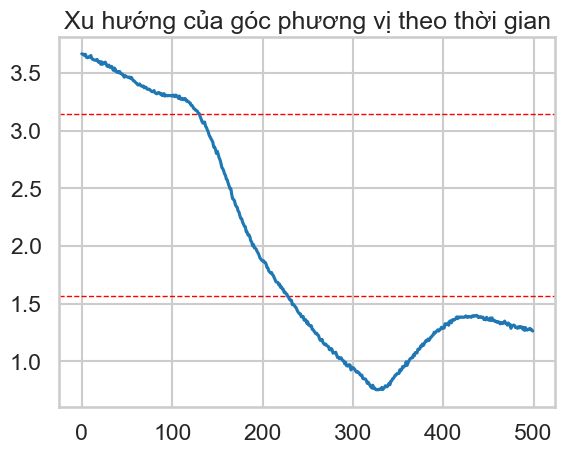

In [224]:
# Thay đổi các giá trị góc phương vị âm để đồng nhất và dễ quan sát trên đồ thị

df.loc[df['Azimuth (rad)'] < 0, 'Azimuth (rad)'] = 2 * np.pi + df['Azimuth (rad)']


plt.axhline(y=np.pi, color='red', linewidth=1, linestyle = "--")
plt.axhline(y=np.pi / 2, color='red', linewidth=1, linestyle = "--")

plt.title("Xu hướng của góc phương vị theo thời gian")
plt.plot(df['Azimuth (rad)'])
plt.show()

<h4>
    Trực quan hoá quỹ đạo của mục tiêu
</h4>

Quỹ đạo của mục tiêu được thể hiện trên mặt phẳng 2D

Trước tiên, ta thêm vào dữ liệu các cột thuộc tính về các giá trị trục hoành (x-axis) và trục tung (y-axis) sau khi đã biết hai thông tin về góc phương vị (Azimuth) và khoảng cách (Range). Hai giá trị này này được tính bằng công thức sau:
<center>
    $x = \cos(\alpha) \cdot d$
    <br>
    $y = \sin(\alpha) \cdot d$
    
    
</center>
<p style="padding-left: 8cm;">
    Trong đó $\alpha$: Góc phương vị; $d$: Khoảng cách (range)
</p>

Để thuận tiện cho việc trực quan, ta cũng sẽ giảm thuộc tính Range đi 1000 lần (về đơn vị km)

In [225]:
df['Range (m)'] = df['Range (m)'] / 1000

df['x-axis'] = np.cos(df['Azimuth (rad)']) * df['Range (m)']
df['y-axis'] = np.sin(df['Azimuth (rad)']) * df['Range (m)']

# Đổi lại tên thuộc tính cho phù hợp
df = df.rename(columns={'Range (m)': 'Range (km)'})

df.head()

,timeSeries,Azimuth (rad),Range (km),x-axis,y-axis
0,0,3.663993,200.076675,-173.391253,-99.830602
1,10,3.660711,198.853775,-172.656196,-98.654255
2,20,3.660269,197.974248,-171.935899,-98.141987
3,30,3.649208,196.907839,-172.079002,-95.715799
4,40,3.660394,195.972307,-170.185084,-97.170893


Lưu lại dữ liệu trên

In [226]:
df.to_csv('data/measData_ver2.csv', index=False)

Trực quan hoá quỹ đạo của mục tiêu trên trục toạ độ Descartes:


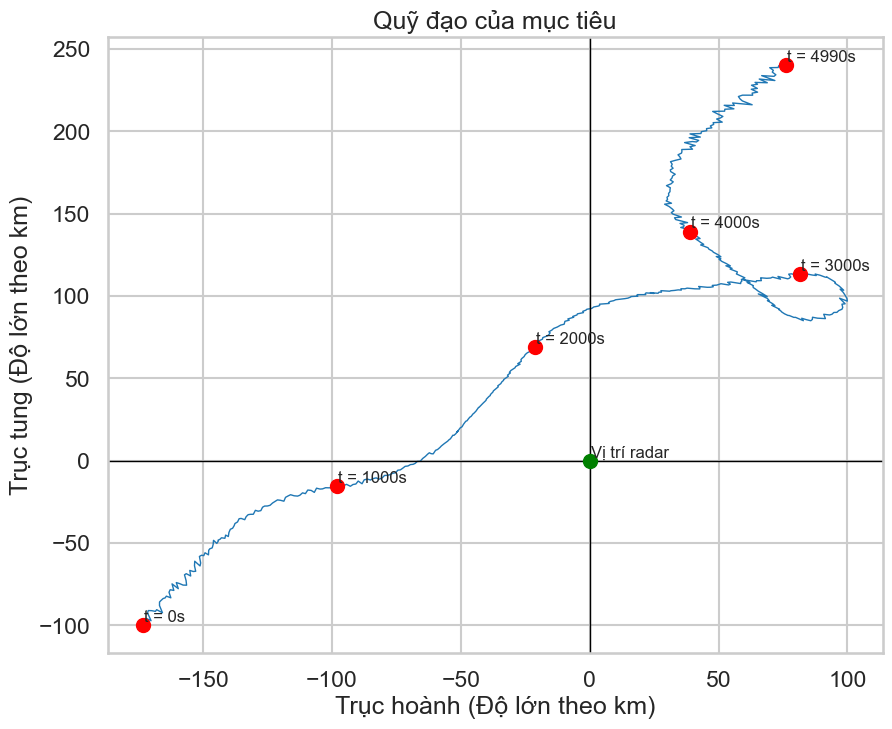

In [227]:
visualize_orbit.plot_orbit(df)

<h5>
    Khảo sát sai số vị trí thực tế và vị trí phát hiện mục tiêu của Radar
</h5>

Biến đổi bảng dữ liệu thực tế: Thêm cột trục toạ độ, chuyển các khoảng cách về km

In [228]:
df_ground_truth['Range (m)'] = df_ground_truth['Range (m)'] / 1000
df_ground_truth = df_ground_truth.rename(columns={"Range (m)": "Range (km)"})

df_ground_truth['Speed (m/s)'] = df_ground_truth['Speed (m/s)'] / 1000
df_ground_truth = df_ground_truth.rename(columns={"Speed (m/s)": "Speed (km/s)"})

df_ground_truth['x-axis'] = np.cos(df_ground_truth['Azimuth (rad)']) * df_ground_truth['Range (km)']
df_ground_truth['y-axis'] = np.sin(df_ground_truth['Azimuth (rad)']) * df_ground_truth['Range (km)']

df_ground_truth.loc[df_ground_truth['Azimuth (rad)'] < 0, 'Azimuth (rad)'] = 2 * np.pi + df_ground_truth['Azimuth (rad)']

df_ground_truth.head()
df_ground_truth.to_csv('data/groundtruthData_ver2.csv', index=False)

Theo dõi sai số về khoảng cách dữa dữ liệu radar và dữ liệu thực tế qua các khoảng thời gian

In [229]:
def visualize_orbit_partially(x, y, time_start, time_stop, size, ax):
    ax.scatter(x[time_start:time_stop], y[time_start:time_stop], s = size)
    ax.plot(x[time_start:time_stop], y[time_start:time_stop])

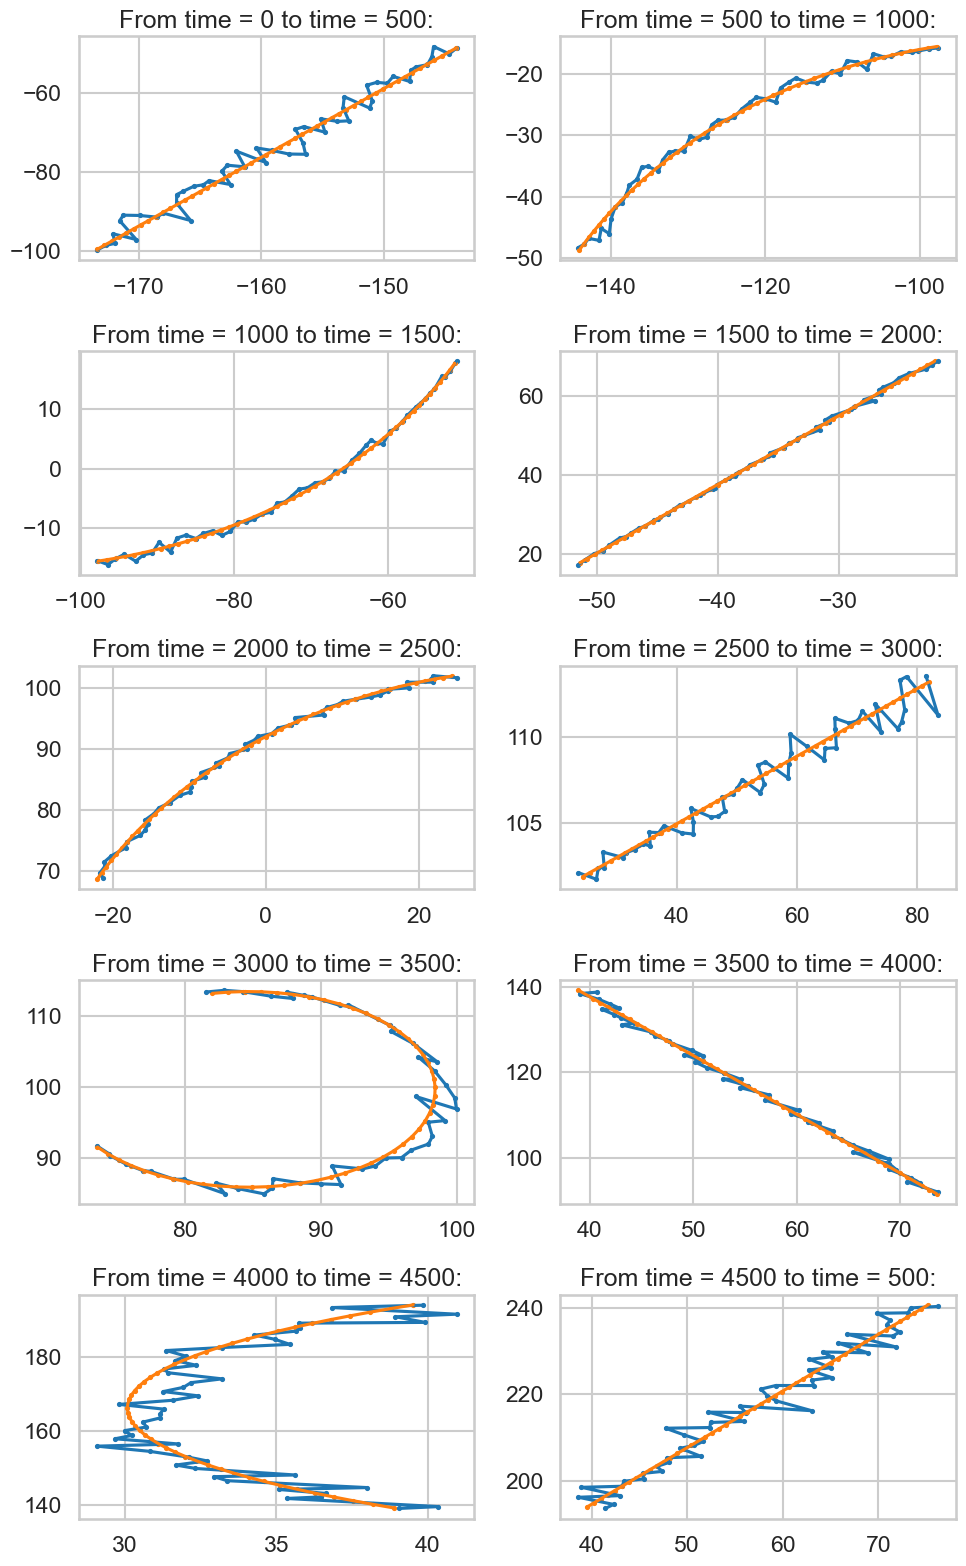

In [230]:
time = 50
real_time = time * 10
size = 5


fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 16))

for i, ax in enumerate(axes.flat):
    visualize_orbit_partially(df['x-axis'], df['y-axis'], i * time, (i + 1) * time, size, ax)
    visualize_orbit_partially(df_ground_truth['x-axis'], df_ground_truth['y-axis'], i * time, (i + 1) * time, size, ax)
    
    if (i + 1) * time < len(df_ground_truth):
        ax.set_title(f"From time = {i * real_time} to time = {(i + 1) * real_time}:")
    else:
        ax.set_title(f"From time = {i * real_time} to time = {len(df_ground_truth)}:")

        
plt.tight_layout()  # Làm cho các chữ không bị dính vào nhau
plt.show()


- Theo dõi biểu đồ trên, có thể đưa ra nhận xét: Sự sai lệch của vị trí của Radar so với mục tiêu có sự sao động nhỏ nhất trong khoảng thời gian từ khoảng (1300, 2500) (s). Vào thời điểm ấy, đối chiếu trên quỹ đạo, ta thấy mục tiêu đang có xu hướng tiến gần về Radar nhất
<br>
- Điều đó cho thấy sự hoạt động hiệu quả của Radar phụ thuộc vào khoảng cách của nó so với mục tiêu

Ta có thể ước lượng bằng đồ thị xem liệu trong bán kính bao nhiêu tính từ Radar thì Radar hoạt động tốt nhất

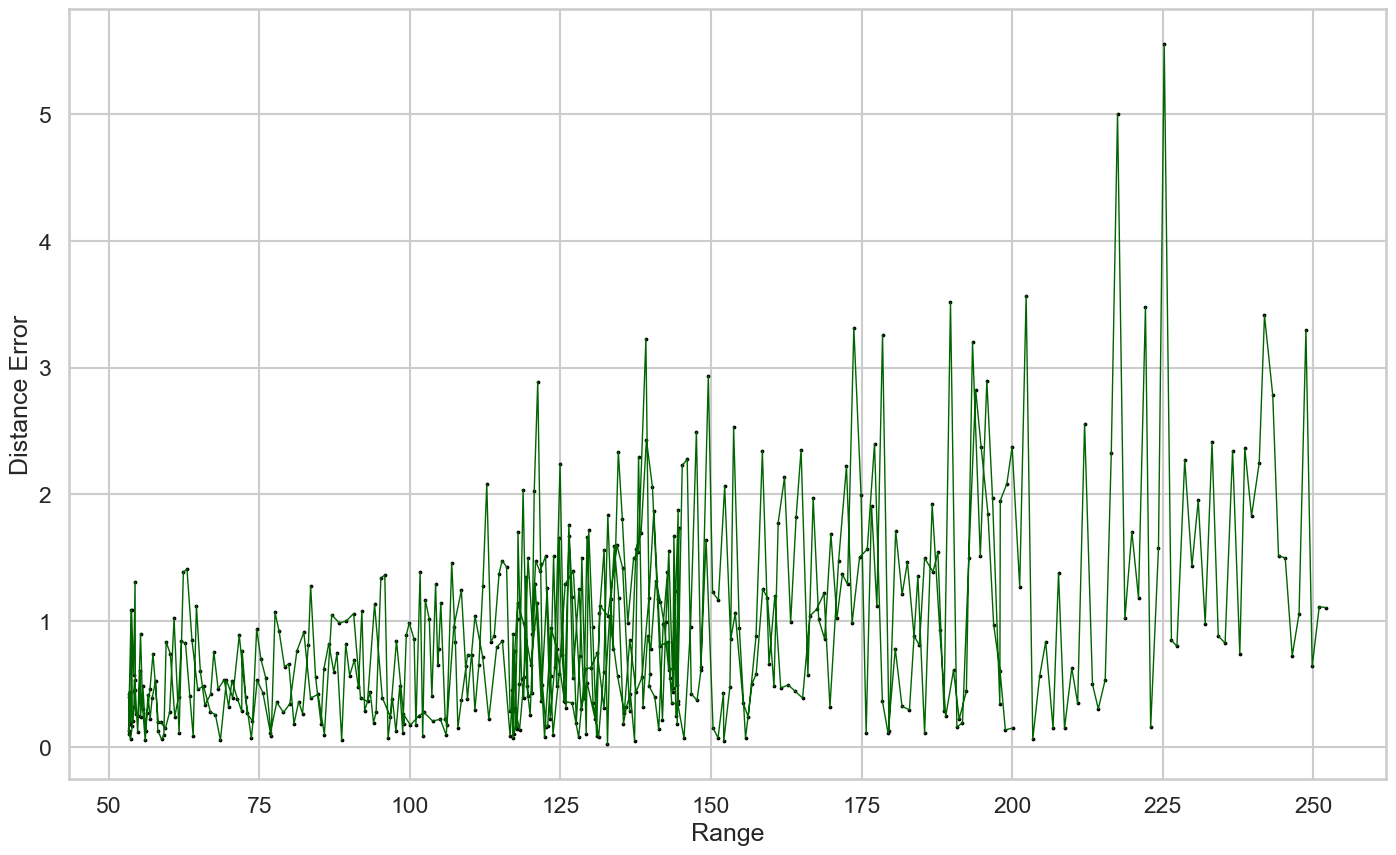

In [249]:
distance_errors = np.sqrt((df['x-axis'] - df_ground_truth['x-axis']) ** 2 + (df['y-axis'] - df_ground_truth['y-axis']) ** 2)

plt.figure(figsize=(17, 10))
plt.plot(df['Range (km)'], distance_errors, linewidth=1, color='darkgreen')
plt.scatter(df['Range (km)'], distance_errors, s=1.5, color='black')

plt.xlabel("Range")
plt.ylabel("Distance Error")

plt.show()


--> Nếu ước lượng chủ quan bằng mắt thường, có thể thấy Radar hoạt động "tốt nhất" trong tầm bán kính khoảng 110km

### Sử dụng thuật toán Moving Average để xử lý dữ liệu nhiễu

Thuật toán Moving Average có nhiều biến thể để phục vụ xử lý dữ liệu nhiễu, trong có có 3 thuật toán mà em sẽ trình bày dưới đây:
- Simple Moving Average (SMA)
- Weighted Moving Average (WMA)
- Expoential Moving Average (EMA)

In [211]:
# Khai báo module đã xây dựng riêng
from private_module import moving_average

df = pd.read_csv("data/measData.csv")
df_ground_truth = pd.read_csv('data/groundtruthData.csv') # Lấy dữ liệu trong thực tế để đối chiếu

azimuth_raw = df['Azimuth (rad)']
range_raw = df['Range (m)'] * 0.001      # Chuyển về km



azimuth_real = df_ground_truth['Azimuth (rad)']
range_real = df_ground_truth['Range (m)'] * 0.001   # Chuyển về km

Trước khi tiến hành vào việc xử lý dữ liệu, ta sẽ biểu diễn dữ liệu trong một khoảng nhỏ để thấy được sự biến động trong dữ liệu.

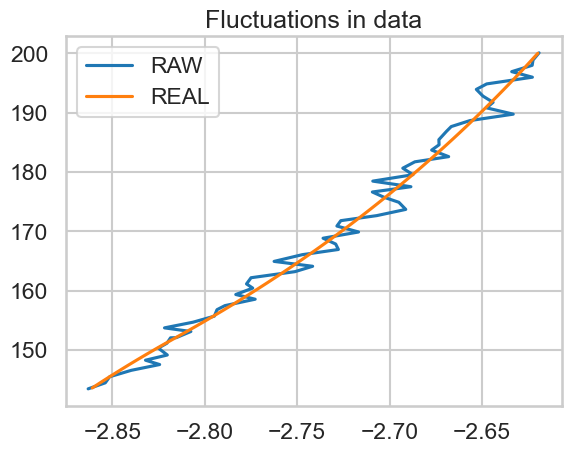

In [212]:
plt.plot(azimuth_raw[:60], range_raw[:60], label='RAW')
plt.plot(azimuth_real[:60], range_real[:60], label='REAL')
plt.legend()
plt.title('Fluctuations in data')
plt.show()

Mọi người có thể nhìn thấy trong hình trên, dữ liệu gốc thu về có sự biến động so với dữ liệu thực tế. Đây là do ảnh hưởng trong quá trình thu nhận dữ liệu, ảnh hưởng khách quan từ yếu tô môi trường. 

Vậy nên trước khi lấy dữ liệu để tính toán, ta cần một bước để xử lý các yếu tố nhiễu này trong dữ liệu.

#### Simple Moving Average 

Thuật toán SMA (Simple Moving Average) sẽ tính giá trị trung bình cho một tập giá trị biết trước. Trong bài toán của chúng ta là tính trung bình của n ngày trước đó

$SMA = \frac{A_1 + A_2 + ... + A_n}{n}$  
Trong đó:  
A: Trung bình của n giá trị trước đó  
n: Số lượng thời gian trước đó.

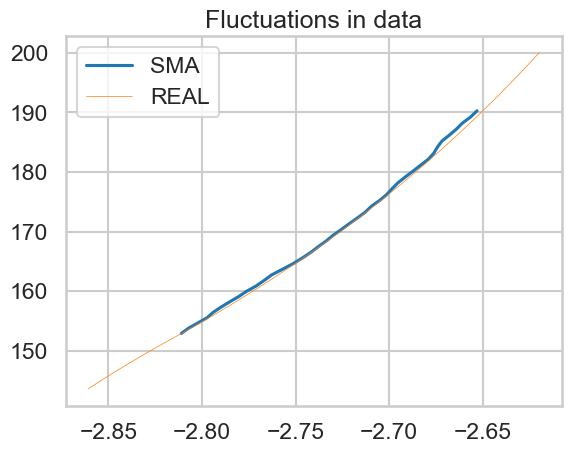

In [213]:
# Sử dụng module SMA để xử lý dữ liệu nhiễu
n_window = 20
sma_azimuth = moving_average.simple_moving_average(azimuth_raw, n_window)
sma_range = moving_average.simple_moving_average(range_raw, n_window)
plt.plot(sma_azimuth[:60], sma_range[:60], label='SMA')
plt.plot(azimuth_real[:60], range_real[:60], label='REAL', lw=0.5)
plt.legend()
plt.title('Fluctuations in data')
plt.show()

Sau khi dùng kỹ thuật SMA để xử lý dữ liệu RAW, ta thấy rõ sự thay đổi của dữ liệu. Sữ liệu sau khi được xử lý đã sát hơn với dữ liệu thực tế.

#### Weighted Moving Average

Kỹ thuật WMA (Weighted Moving Average) sẽ gán thêm trọng số vào các điểm dữ liệu trong quá khứ, sau đó tính tổng tập dữ liệu đó.  
  
$WMA = \frac{Value_1 * n + Value_2 * (n-1) + ... Value_n}{[n * (n + 1)]/2}$  
  
Trong đó:  
N là thời gian trước đó

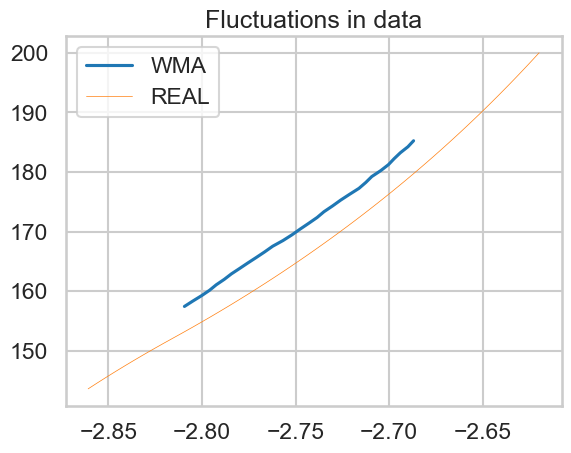

In [214]:
# Sử dụng module wma để xử lý dữ liệu nhiễu
n_window = 30
wma_azimuth = moving_average.weighted_moving_average(azimuth_raw, n_window)
wma_range = moving_average.simple_moving_average(range_raw, n_window)
plt.plot(wma_azimuth[:60], wma_range[:60], label='WMA')
plt.plot(azimuth_real[:60], range_real[:60], label='REAL', lw=0.5)
plt.legend()
plt.title('Fluctuations in data')
plt.show()

#### Exponential Moving Average

Kỹ thuật EMA (Exponential Moving Average) cho trọng số vào các giá trị gần đây trong chuỗi thời gian để làm nó có thêm sự liên quan đến thông tin mới sau đó.   

Thì trước khi tính một EMA, ta cần tính một lượng giá trị SMA nhất định trước đó.  

Sau đó, ta sẽ nhân giá trị SMA đó với trọng số được gọi là "smoothing factor", tính bởi công thức:  

$sf = \frac{2}{d + 1}$  

Và cuối cùng, công thức tính tổng quát của EMA sẽ là:  

$EMA_t = (V_t * sf) + EMA_y * (1 -sf)$   

Trong đó:  
- $EMA_t$ = EMA hiện tại  
- $V_t$ = Giá trị thời điểm hiện tại  
- $EMA_y$ = EMA trước đó  
- d = Số thời gian trước đó
- sf = smoothing factor

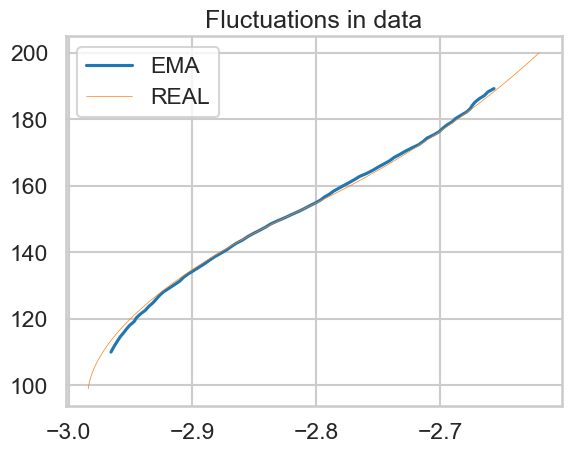

In [215]:
# Sử dụng module ema để xử lý dữ liệu nhiễu
n_window = 20

ema_azimuth = moving_average.exponential_moving_average(azimuth_raw, n_window)
ema_range = moving_average.exponential_moving_average(range_raw, n_window)
plt.plot(ema_azimuth[:100], ema_range[:100], label='EMA')
plt.plot(azimuth_real[:100], range_real[:100], label='REAL', lw=0.5)
plt.legend()
plt.title('Fluctuations in data')
plt.show()

#### So sánh các kỹ thuật MA (Moving Average)

Sự khác nhau giữa SMA vs WMA:
- SMA chỉ đơn giản là tính trung bình của các điểm dữ liệu trong bộ, và trọng số được gán bằng nhau cho tất cả các quan sát của mẫu.  
- Trong khi đó, WMA sẽ gán một trọng số nhất định cho từng quan sát, với mỗi quan sát gần đây nhất sẽ được gán trọng số lớn hơn các quan sát trước đó. Việc này để thể hiện rõ sự tác động của các quan sát gần đây nhất với giá trị hiện tại


Sự khác nhau giữa SMA và EMA:  
- SMA tương đối chậm trong phản ứng vì nó tính toán trung bình của các giá trị trong một khoảng thời gian dài hơn, và không nhấn mạnh các giá trị gần đây.  
- Trong khi đó EMA phản ứng nhanh với sự thay đổi trong dữ liệu, vì các giá trị gần đây được đánh giá cao hơn trong quá trình tính toán từ đó ảnh hưởng đến kết quả. 